### Grip At Sparks Foundation Intern
- Name:Nithish Kumar
- Task-6: Iris Species Classification

### Supervised machine learning classification problem
problem - To classify the species by using the data. 
    sepal length (cm)  - Continuous variable    
    sepal width (cm)   - Continuous variable
    petal length (cm)  - Continuous variable    
    petal width (cm)   - Continuous variable
    target             - Categorical label.

### Importing Required Libraries and Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris  = load_iris()

### Creating DataFrame

In [2]:
data = pd.DataFrame(data = iris['data'],columns = iris['feature_names'])

In [3]:
data['target'] = iris['target']

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Shape and Columns In Data

In [6]:
data.shape

(150, 5)

In [7]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

### Check for null

In [8]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### Statistical Information About Data

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [11]:
corr = data.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


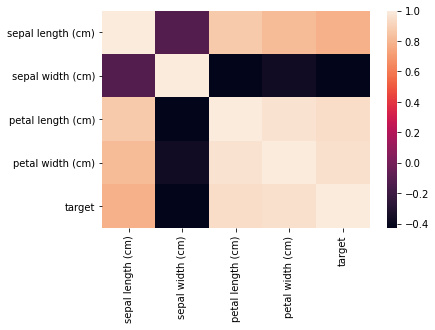

In [12]:
sns.heatmap(corr)

### balanced dataset

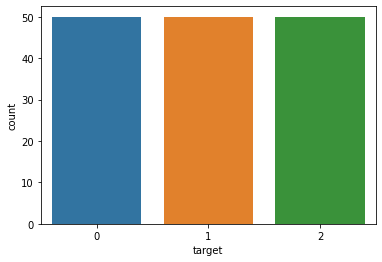

In [13]:
sns.countplot(data['target'])

### scatter plot 

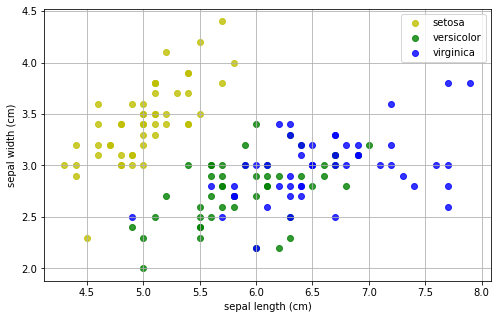

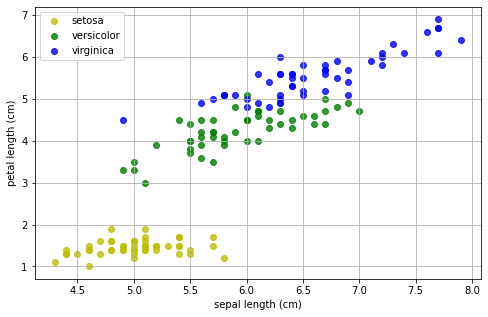

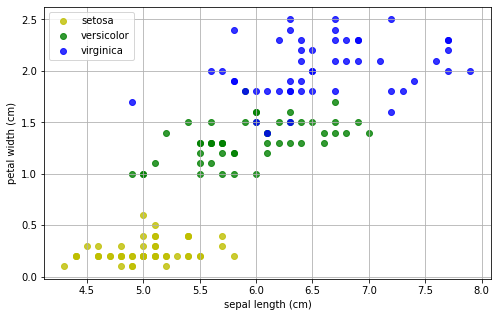

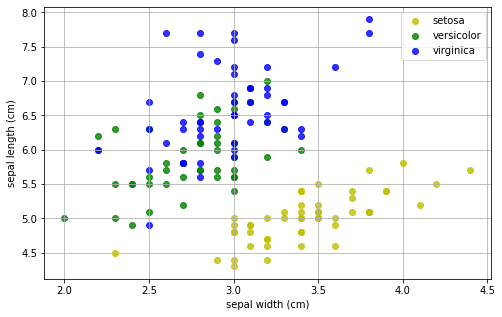

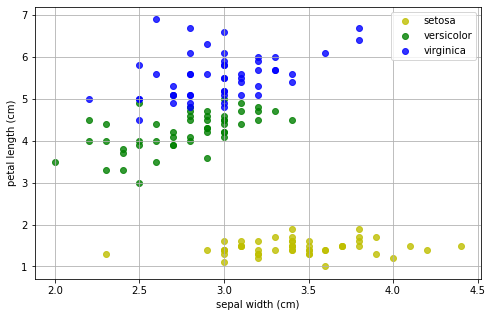

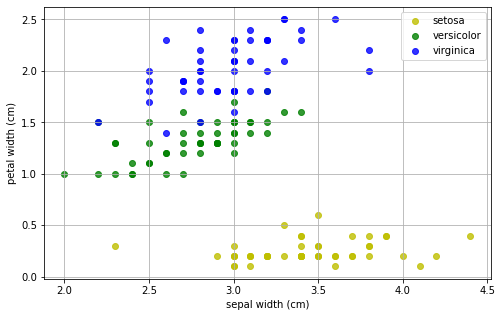

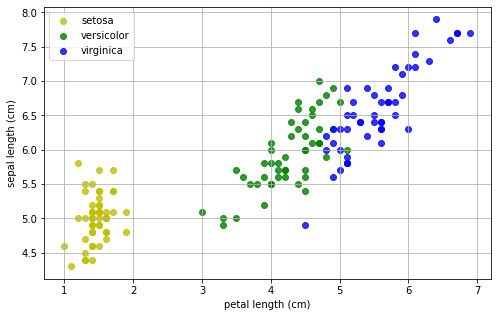

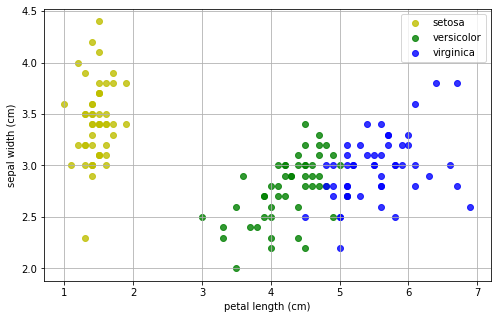

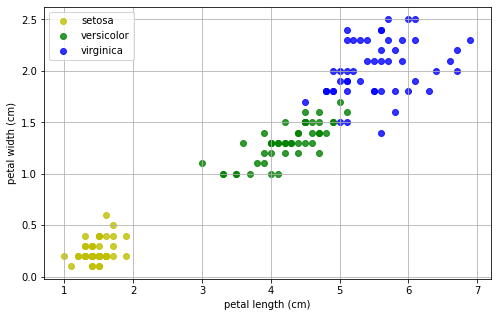

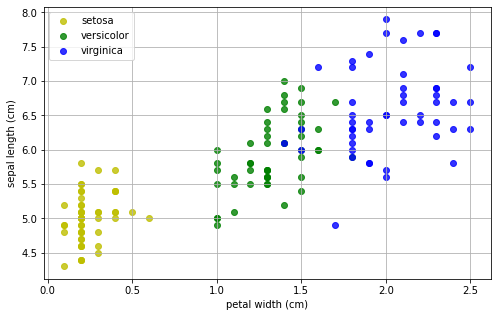

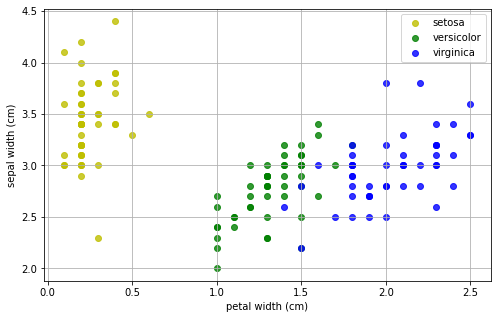

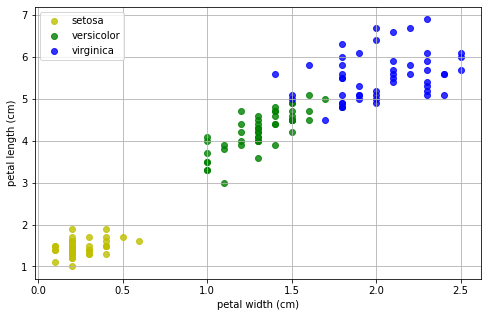

In [14]:
def scatterplot(x,y,dataframe):
    color = ['y','g','b']
    targets = [0,1,2]
    target_names = iris['target_names']
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    count = 0
    for target,name in zip(targets,target_names):
        sns.regplot(dataframe[dataframe['target'] == target][x],
                    dataframe[dataframe['target'] == target][y],
                    fit_reg=False,color = color[count],label=name)
        count+=1
    plt.legend()
    plt.grid(True)
    plt.show()

for i in data.columns[:-1]:
    for j in data.columns[:-1]:
        if i != j:
            scatterplot(i,j,data)

### Dividing a data into Training and Testing Phase

Dividing data into Training (70 percent) and Testing (30 percent)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('target',axis = 1),data['target'],test_size=0.3)

### Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tr = DecisionTreeClassifier()

### Selecting Random Combinations of Hyperparameters
It will gives best parameters 

In [17]:
from sklearn.model_selection import RandomizedSearchCV
criterion = ["gini", "entropy"]
min_samples_split=list(range(2,20,2))
min_samples_leaf=list(range(2,20,2))
max_features = ["auto", "sqrt", "log2"]
max_depth = list(range(1,51,5))
decision_params = {'criterion':criterion,'min_samples_split':min_samples_split,
                'min_samples_leaf':min_samples_leaf,'max_features':max_features,
                'max_depth':max_depth}

In [18]:
Rsearch = RandomizedSearchCV(estimator = tr,cv=5,param_distributions=decision_params,n_iter=100,)
Rsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18]})

#### Best parameters find by Randomsearchcv

In [19]:
Rsearch.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 14,
 'max_features': 'auto',
 'max_depth': 41,
 'criterion': 'gini'}

### Model

In [20]:
tr = DecisionTreeClassifier(min_samples_split= 12,min_samples_leaf= 14,max_features= 'auto',max_depth= 41,criterion= 'gini')
model = tr.fit(x_train,y_train)

In [21]:
pred = model.predict(x_test)

### Accuracy

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("accuracy of the model is {:.2f}".format(accuracy_score(y_test,pred)*100))

accuracy of the model is 93.33


### Confusion Matrix 

In [23]:
matrix = confusion_matrix(y_test,pred)
matrix

array([[14,  1,  0],
       [ 1, 13,  0],
       [ 1,  0, 15]], dtype=int64)

### Classification Report 

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.93      0.93        14
           2       1.00      0.94      0.97        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



### Tree Graph

[Text(136.96363636363637, 190.26, 'X[0] <= 5.45\ngini = 0.666\nsamples = 105\nvalue = [35, 36, 34]'),
 Text(60.872727272727275, 135.9, 'X[1] <= 3.15\ngini = 0.239\nsamples = 36\nvalue = [31, 5, 0]'),
 Text(30.436363636363637, 81.53999999999999, 'gini = 0.459\nsamples = 14\nvalue = [9, 5, 0]'),
 Text(91.30909090909091, 81.53999999999999, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0]'),
 Text(213.05454545454546, 135.9, 'X[3] <= 1.75\ngini = 0.552\nsamples = 69\nvalue = [4, 31, 34]'),
 Text(152.1818181818182, 81.53999999999999, 'X[2] <= 4.15\ngini = 0.355\nsamples = 38\nvalue = [4, 30, 4]'),
 Text(121.74545454545455, 27.180000000000007, 'gini = 0.391\nsamples = 15\nvalue = [4, 11, 0]'),
 Text(182.61818181818182, 27.180000000000007, 'gini = 0.287\nsamples = 23\nvalue = [0, 19, 4]'),
 Text(273.92727272727274, 81.53999999999999, 'X[0] <= 6.45\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(243.4909090909091, 27.180000000000007, 'gini = 0.124\nsamples = 15\nvalue = [0, 1, 14]'),
 Tex

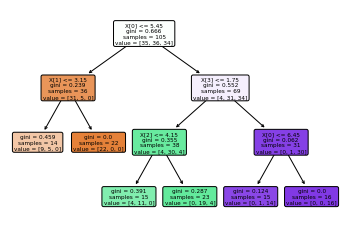

In [25]:
plot_tree(tr,filled = True,rounded=True)